## Plotting functions in R<sup>2</sup>

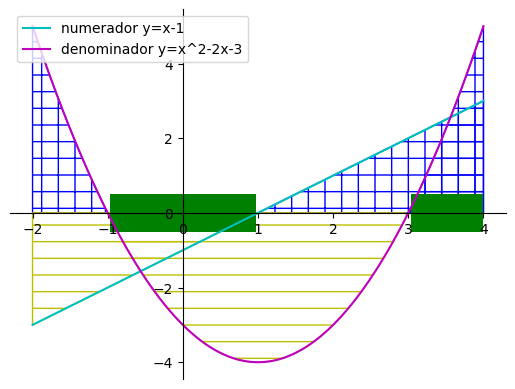

In [1]:
# finding positive and negative regions in a fraction function

import matplotlib.pyplot as plt
import numpy as np


# 100 linearly spaced numbers
x = np.linspace(-2,4,100)

# the functions, which are y = sin(x) and z = cos(x) here
y = x-1
labely='numerador y=x-1'
z = x**2-2*x-3
labelz='denominador y=x^2-2x-3'


# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.fill_between(x,0,y,where=y>0,hatch='+',edgecolor='b',facecolor='none')
ax.fill_between(x,0,z,where=z>0,hatch='+',edgecolor='b',facecolor='none')
ax.fill_between(x,0,y,where=y<0,hatch='-',edgecolor='y',facecolor='none')
ax.fill_between(x,0,z,where=z<0,hatch='-',edgecolor='y',facecolor='none')
ax.fill_between(x,-0.5,0.5,where=(z>0) & (y>0),facecolor='green')
ax.fill_between(x,-0.5,0.5,where=(z<0) & (y<0),facecolor='green')

# plot the functions
plt.plot(x,y, 'c', label=labely)
plt.plot(x,z, 'm', label=labelz)

plt.legend(loc='upper left')


# show the plot

plt.savefig('posneg1.png')
plt.show()

#plotting a function

## Plotting affine transformations

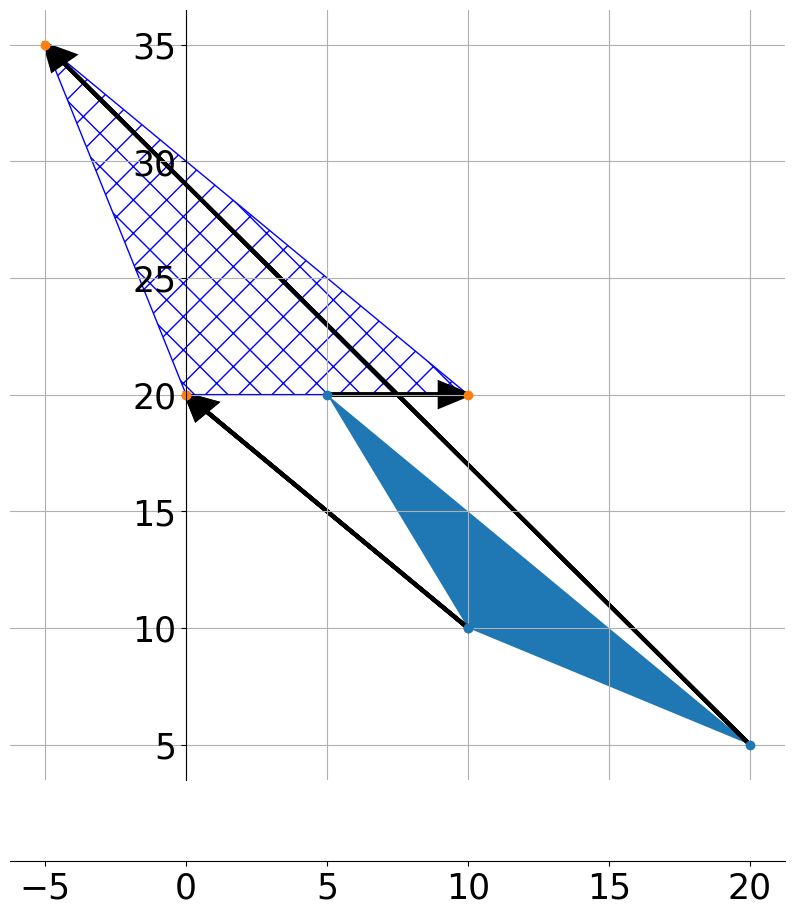

[[ 0 10 -5  0]
 [20 20 35 20]] transafi


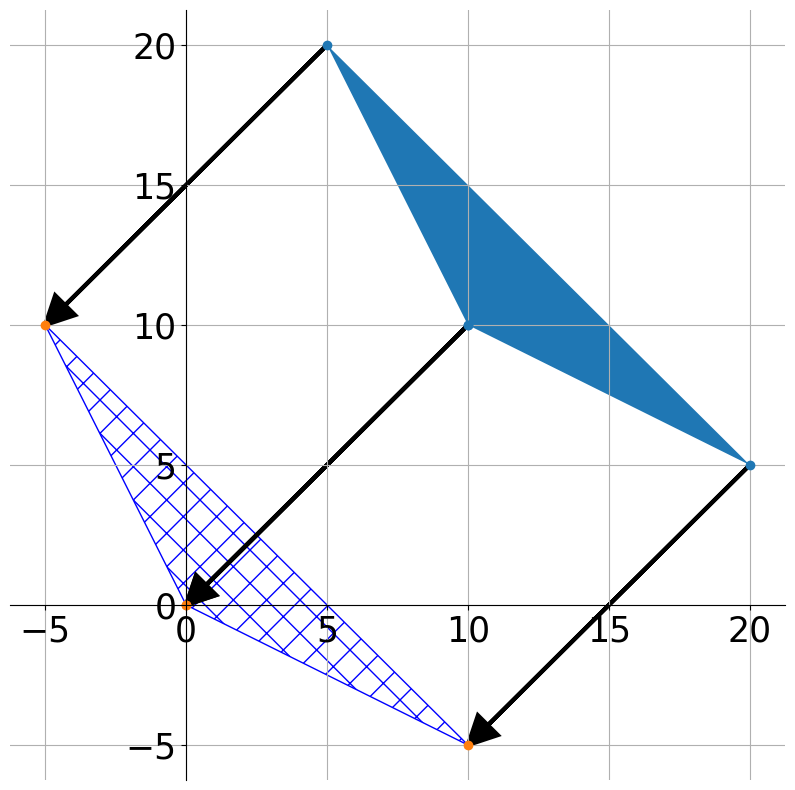

[[ 0 -5 10  0]
 [ 0 10 -5  0]] translation


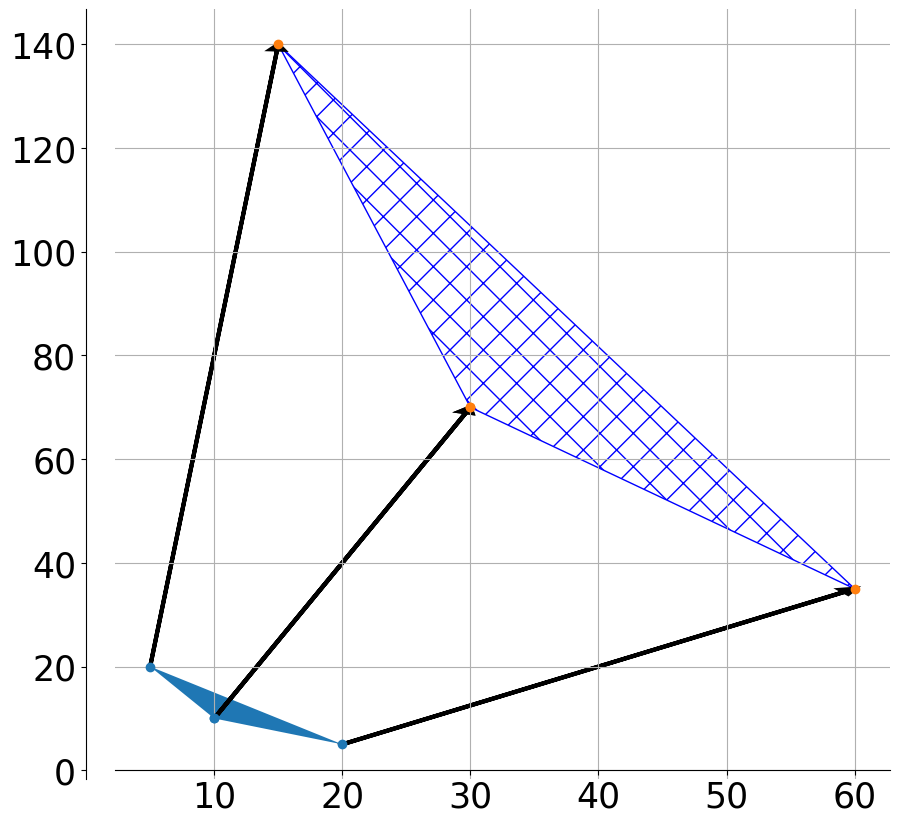

[[ 30  15  60  30]
 [ 70 140  35  70]] escala


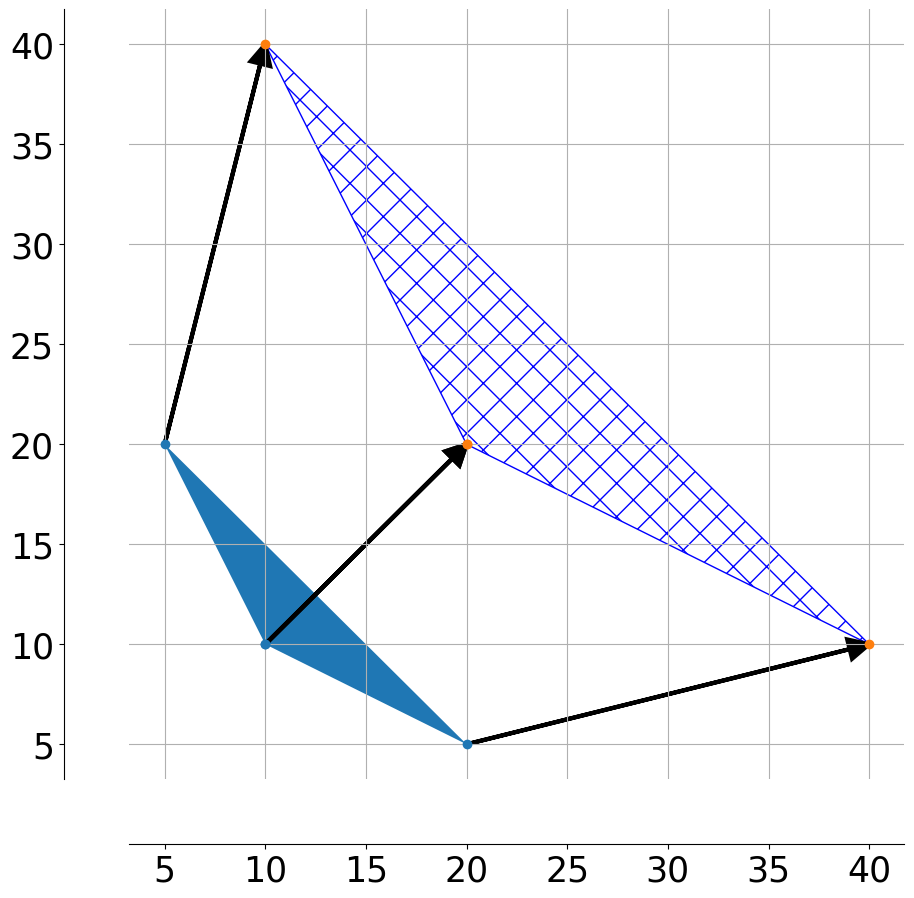

[[20 10 40 20]
 [20 40 10 20]] homotecia


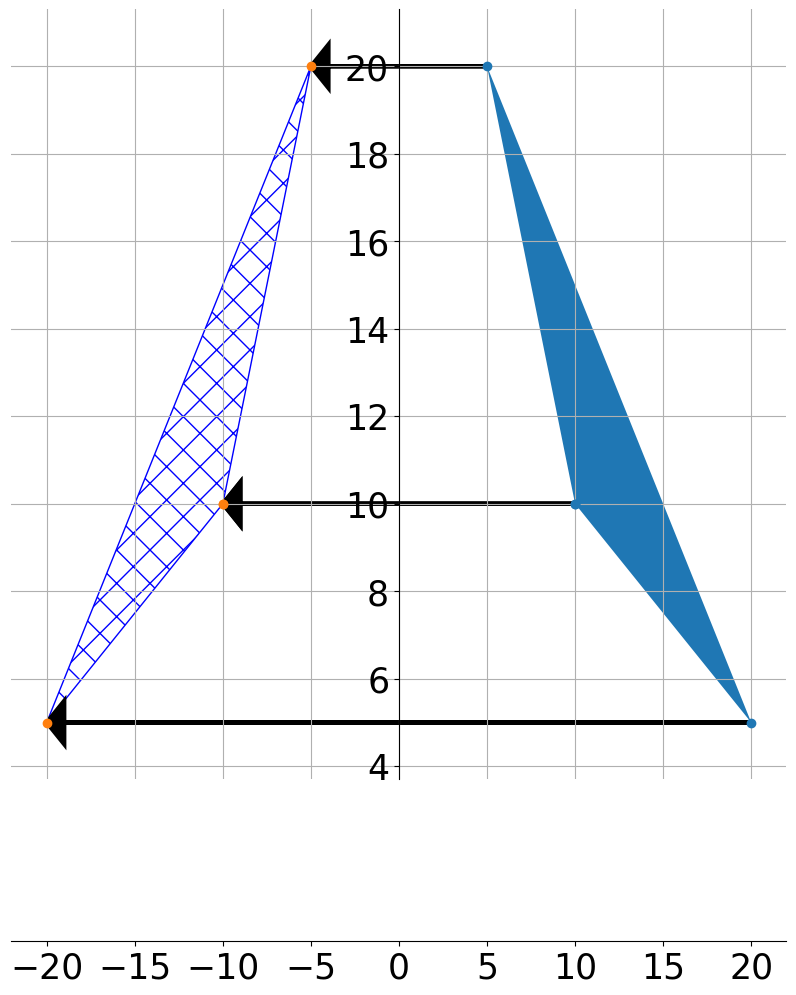

[[-10  -5 -20 -10]
 [ 10  20   5  10]] simetriaY


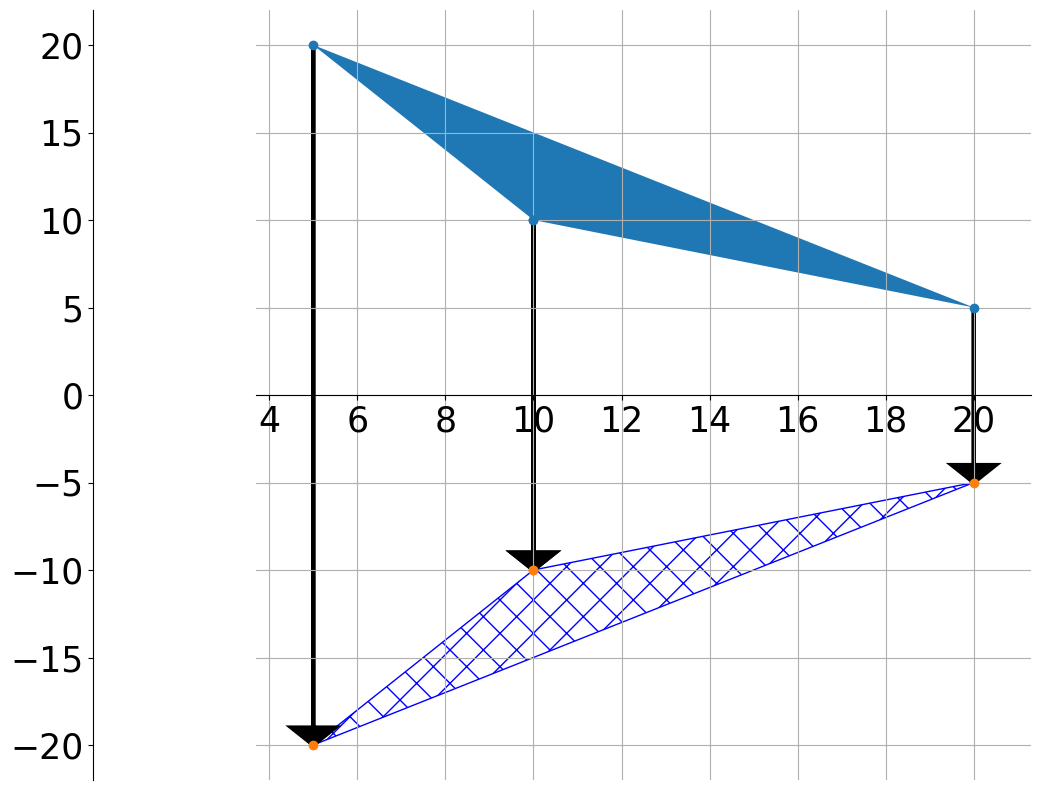

[[ 10   5  20  10]
 [-10 -20  -5 -10]] simetriaX


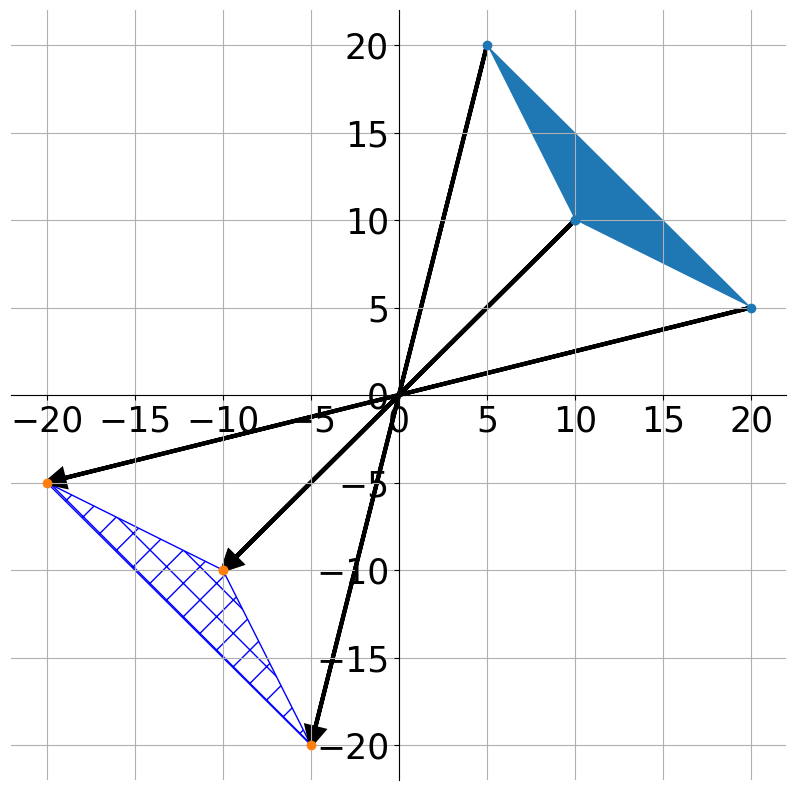

[[-10  -5 -20 -10]
 [-10 -20  -5 -10]] simetriaO


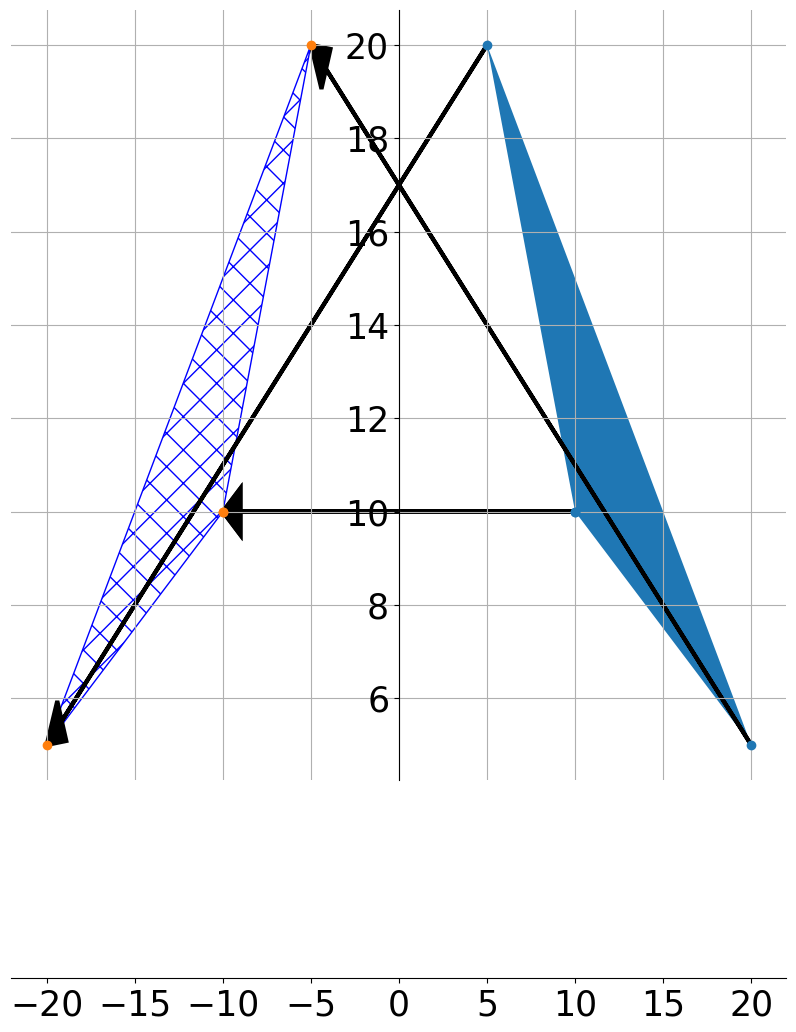

[[-10. -20.  -5. -10.]
 [ 10.   5.  20.  10.]] rotacio


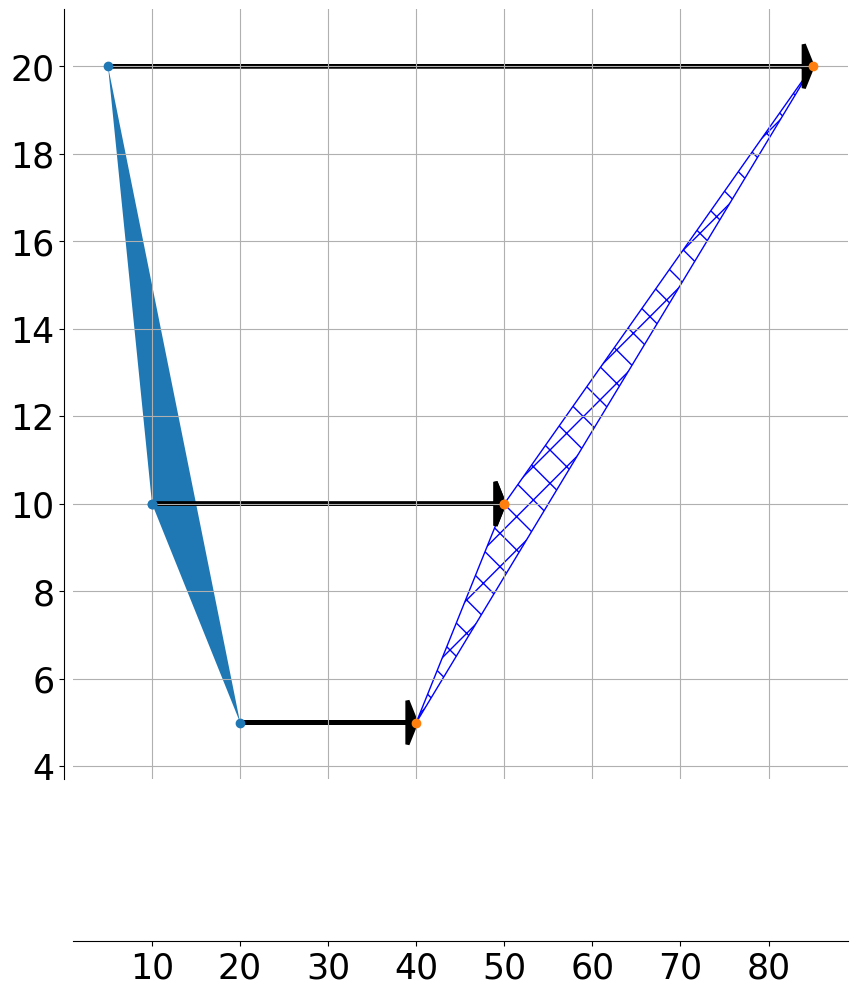

[[50 85 40 50]
 [10 20  5 10]] shear


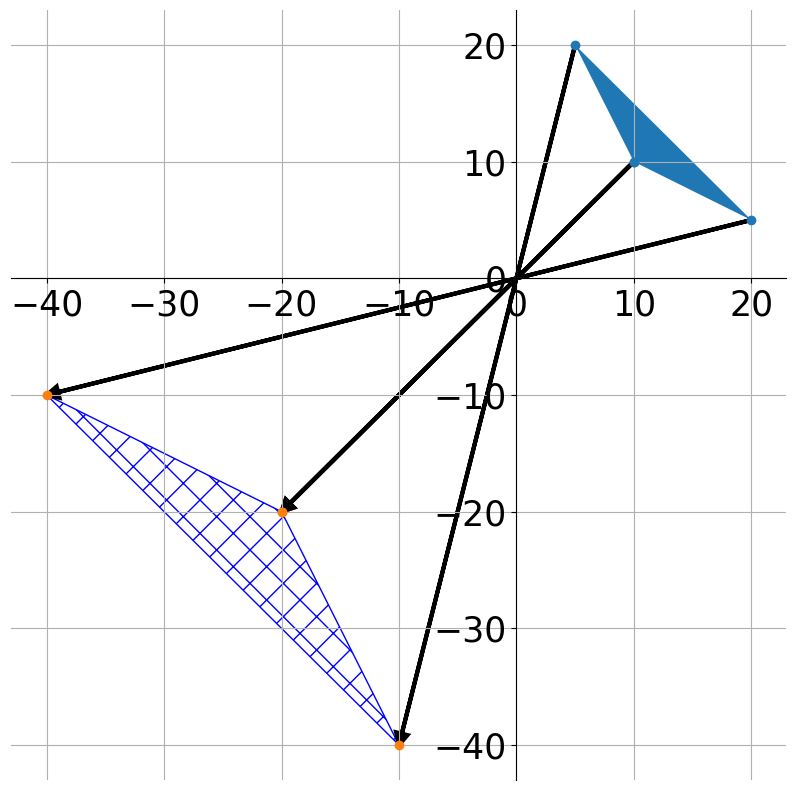

[[-20 -10 -40 -20]
 [-20 -40 -10 -20]] homoteciaInversa
----- [[10  5 20 10]
 [10 20  5 10]] [10 10] [ 5 20] 3 35 35 ------

 P1 [[10  5 20 10]
 [10 20  5 10]] 
 P1-Cmat [[-1.66666667 -6.66666667  8.33333333 -1.66666667]
 [-1.66666667  8.33333333 -6.66666667 -1.66666667]] 
 Cvec [11.66666667 11.66666667] 
 Cmat [[11.66666667 11.66666667 11.66666667 11.66666667]
 [11.66666667 11.66666667 11.66666667 11.66666667]]


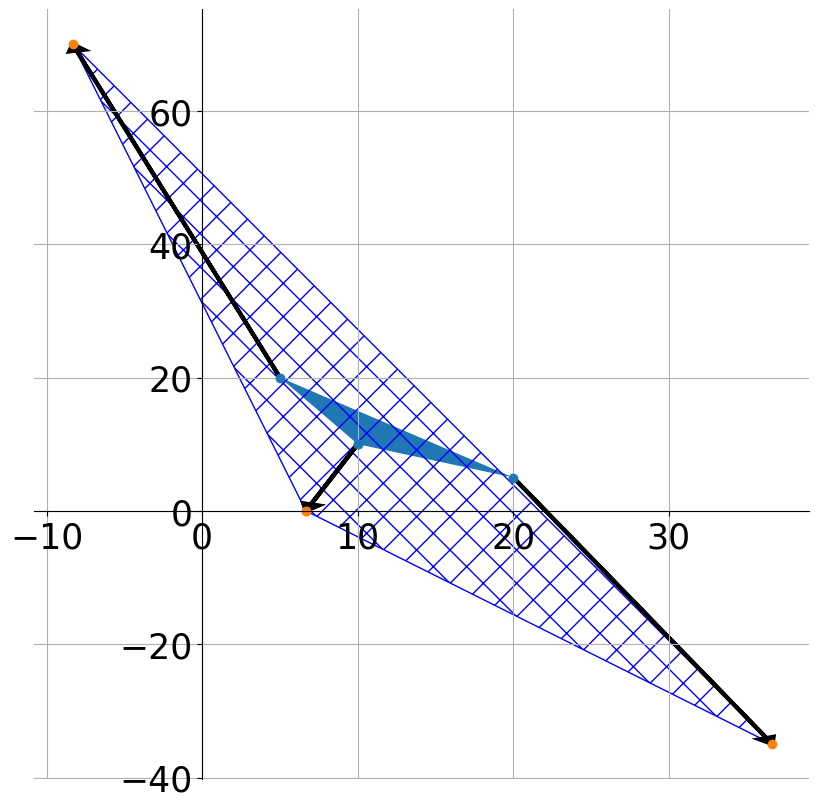

[[ 6.66666667e+00 -8.33333333e+00  3.66666667e+01  6.66666667e+00]
 [ 3.55271368e-15  7.00000000e+01 -3.50000000e+01  3.55271368e-15]] canviescala
----- [[10  5 20 10]
 [10 20  5 10]] [10 10] [ 5 20] 3 35 35 ------

 P1 [[10  5 20 10]
 [10 20  5 10]] 
 P1-Cmat [[-1.66666667 -6.66666667  8.33333333 -1.66666667]
 [-1.66666667  8.33333333 -6.66666667 -1.66666667]] 
 Cvec [11.66666667 11.66666667] 
 Cmat [[11.66666667 11.66666667 11.66666667 11.66666667]
 [11.66666667 11.66666667 11.66666667 11.66666667]]


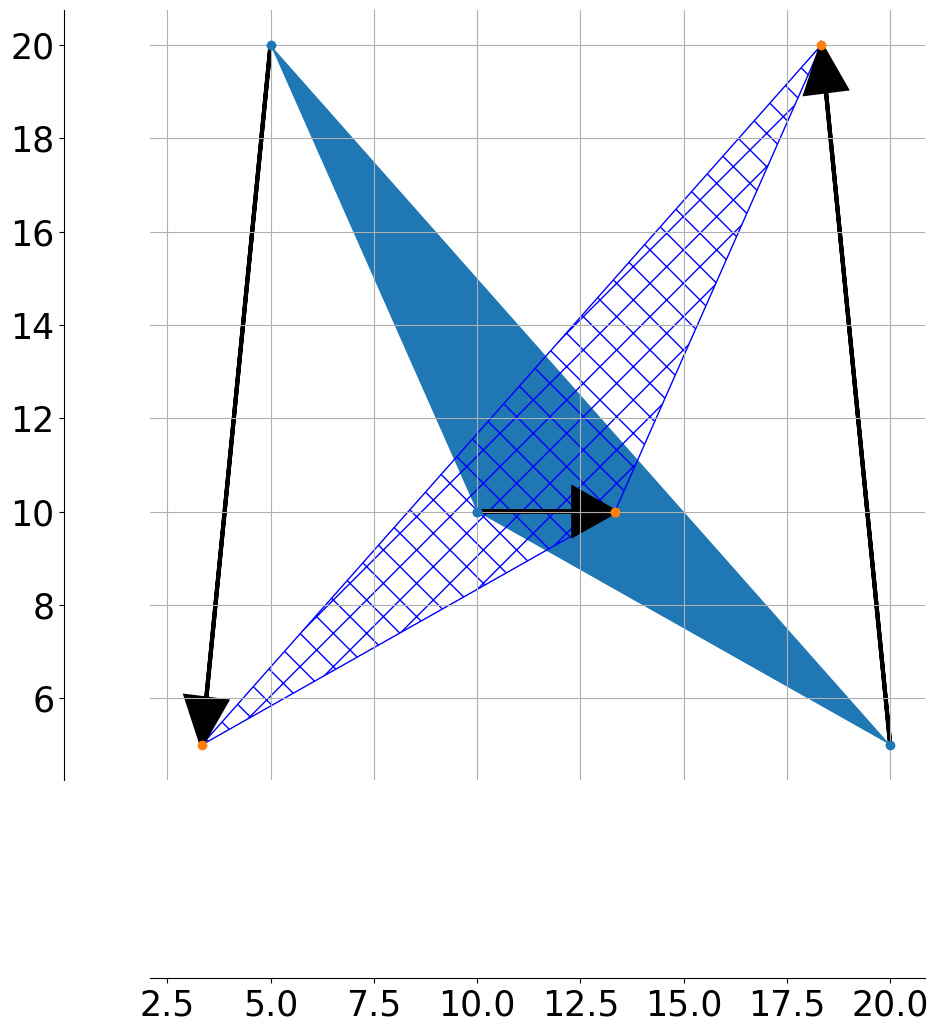

[[13.33333333  3.33333333 18.33333333 13.33333333]
 [10.          5.         20.         10.        ]] rotacioC
----- [[10  5 20 10]
 [10 20  5 10]] [10 10] [ 5 20] 3 35 35 ------

 P1 [[10  5 20 10]
 [10 20  5 10]] 
 P1-Cmat [[-1.66666667 -6.66666667  8.33333333 -1.66666667]
 [-1.66666667  8.33333333 -6.66666667 -1.66666667]] 
 Cvec [11.66666667 11.66666667] 
 Cmat [[11.66666667 11.66666667 11.66666667 11.66666667]
 [11.66666667 11.66666667 11.66666667 11.66666667]]


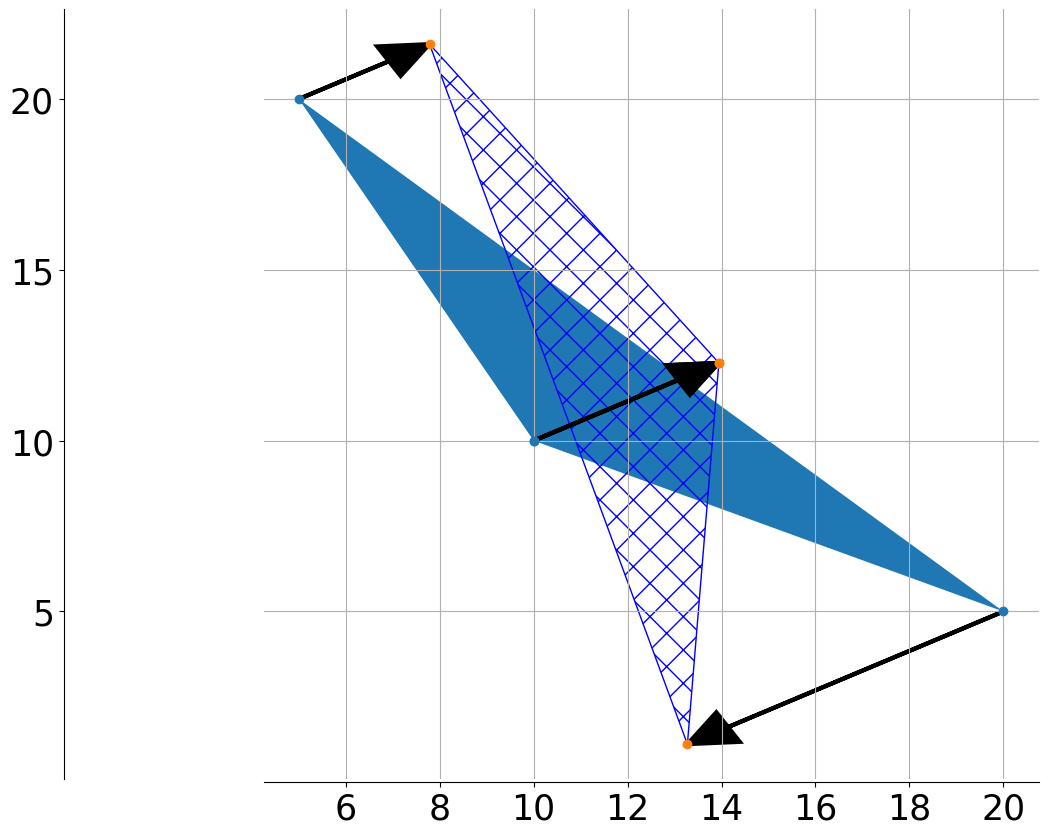

[[13.94337567  7.78312164 13.27350269 13.94337567]
 [12.27670901 21.60683603  1.11645497 12.27670901]] simetriatheta


In [2]:
# transformació afí d'un polígon a R2

import matplotlib.pyplot as plt
import numpy as np
import math

def rotmatrix(alpha):
    A = np.array([[math.cos(alpha), -math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
    return A

def centroid(arr):                # faig el centroide del polígon. Cal fixar-se que aquest té un punt més del desitjat per al càlcul
    length = arr.shape[1]-1
    sum_x = np.sum(arr[0,:-1])
    sum_y = np.sum(arr[1,:-1])
    print('-----',arr,arr[:,0],arr[:,1],length,sum_x,sum_y,'------')
    C = np.array([sum_x/length,sum_y/length])
    return C

def transformacioAfi(A,B,P1orig,P1transf,nom):   #uso dos P1, per si cal dibuixar l'original
    P1=P1transf           #el que usaré per als càlculs
    columns = P1.shape[1]
    rows = P1.shape[0]

    # aplico la transformada afí
    P2=A.dot(P1)
    for j in range(columns):
        P2[:,j] = P2[:,j]+B

    # setting the axes at the centre
    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.grid(True)

    # dibuixo els polígons
    plt.plot(P1orig[0,:],P1orig[1,:], 'o')
    plt.plot(P2[0,:],P2[1,:], 'o')
    plt.fill(P1orig[0,:],P1orig[1,:])
    plt.fill(P2[0,:],P2[1,:],hatch="X",color="none",edgecolor="b")

    # dibuixo els vectors que han generat el desplaçament dels punts
    for i in range(columns):
        ax.arrow(P1orig[0,i],P1orig[1,i],P2[0,i]-P1orig[0,i],P2[1,i]-P1orig[1,i], 
                 head_width=1, head_length=1, linewidth=3, length_includes_head=True,
                 fc='k', ec='k')

    # show the plot

    plt.savefig(nom+'.png')
    plt.show()
    return(P2)

# el polígon a transformar té un nombre de vèrtex n. L'array que genero repeteix el primer
# vèrtex en la darrera posició per tal de poder fer un plt.fill al fer el gràfic
P1 = np.array([[10,5,20,10],[10,20,5,10]])

#######################################
# TRANSFORMACIONS AFINS ELEMENTALS
#######################################

A = np.array([[0, 1],[2,1]]); B = np.array([-10,-10]); nom='transafi'# generic example
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[1, 0],[0,1]]); B = np.array([-10,-10]); nom='translation'  # translation
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[3, 0],[0,7]]); B = np.array([0,0]); nom= 'escala'  # scaling
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[2, 0],[0,2]]); B = np.array([0,0]); nom= 'homotecia'  # homotècia de raó
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[-1, 0],[0,1]]); B = np.array([0,0]); nom='simetriaY'  # simetria axial respecte eix Y
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[1, 0],[0,-1]]); B = np.array([0,0]); nom='simetriaX'  # simetria axial respecte eix X
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[-1, 0],[0,-1]]); B = np.array([0,0]); nom='simetriaO'  # simetria axial respecte orígen de coordenades
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
alpha= math.pi/2; A = rotmatrix(alpha); B = np.array([0,0]); nom='rotacio'  # rotació
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)
A = np.array([[1, 4],[0,1]]); B = np.array([0,0]); nom='shear'  # shear / cisallament
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)

#######################################
# COMPOSICIÓ DE TRANSFORMACIONS AFINS ELEMENTALS
#######################################

# Homotècia inversa

A1 = np.array([[-1, 0],[0,-1]])
A2 = np.array([[2, 0],[0,2]])
A = A1.dot(A2); B = np.array([0,0]); nom= 'homoteciaInversa'  # homotècia inversa
P2=transformacioAfi(A,B,P1,P1,nom)
print(P2,nom)

# Canvi d'escala in situ d'un objecte

Cvec = centroid(P1)
Cmat = Cvec
for i in range(int(P1.shape[1])-1):     # creo una matriu per poder sumar totes les coordinades als vèrtex (poc elegant, ho sé)
    Cmat = np.c_[Cmat,Cvec]
print('\n P1',P1,'\n P1-Cmat',P1-Cmat,'\n Cvec',Cvec,'\n Cmat',Cmat)
A = np.array([[3, 0],[0,7]]); B = np.array([0,0]); nom= 'canviescala'  # canvi d'escala de centre en punt diferent de O
P2=transformacioAfi(A,Cvec,P1,P1-Cmat,nom)
print(P2,nom)

# Rotació in situ d'un objecte

Cvec = centroid(P1)
Cmat = Cvec
for i in range(int(P1.shape[1])-1):     # creo una matriu per poder sumar totes les coordinades als vèrtex (poc elegant, ho sé)
    Cmat = np.c_[Cmat,Cvec]
print('\n P1',P1,'\n P1-Cmat',P1-Cmat,'\n Cvec',Cvec,'\n Cmat',Cmat)
A = rotmatrix(alpha); B = np.array([0,0]); nom= 'rotacioC'  # rotació en punt C diferent de O
P2=transformacioAfi(A,Cvec,P1,P1-Cmat,nom)
print(P2,nom)

# Simetria respecte una recta que passa pel punt C

Cvec = centroid(P1)
Cmat = Cvec
theta = -math.pi/3
for i in range(int(P1.shape[1])-1):     # creo una matriu per poder sumar totes les coordinades als vèrtex (poc elegant, ho sé)
    Cmat = np.c_[Cmat,Cvec]
print('\n P1',P1,'\n P1-Cmat',P1-Cmat,'\n Cvec',Cvec,'\n Cmat',Cmat)
A = rotmatrix(theta).dot(np.array([[1, 0],[0,-1]]).dot(rotmatrix(-theta)))
B = np.array([0,0]); nom= 'simetriatheta'  # simetria respecte una recta donada d'inclinació theta
P2=transformacioAfi(A,Cvec,P1,P1-Cmat,nom)
print(P2,nom)


FileNotFoundError: [Errno 2] No such file or directory: '../quizes/figures/transafiHom.png'

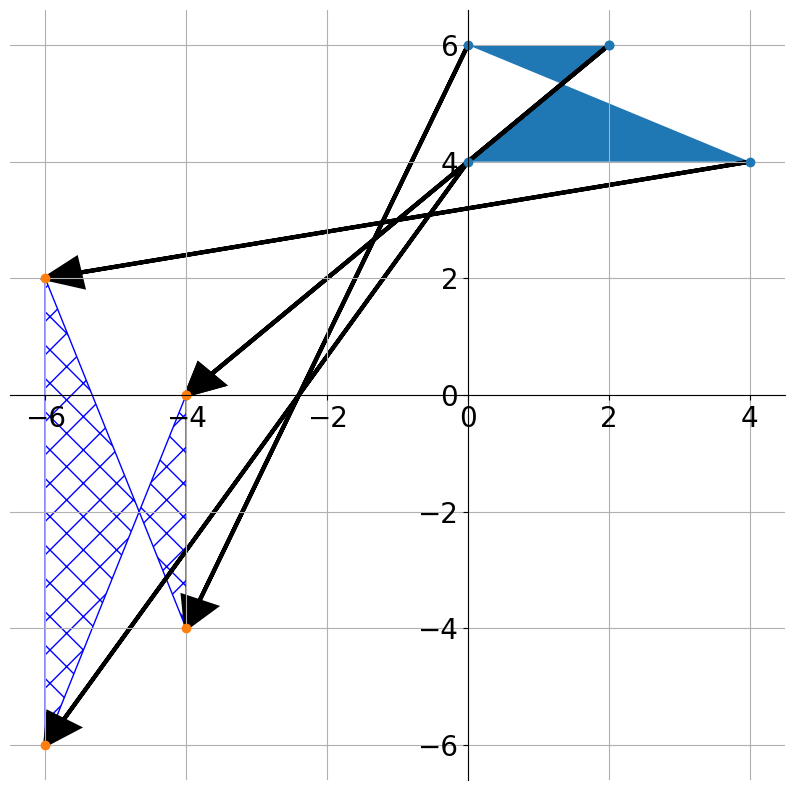

In [3]:
# transformació afí d'un polígon a R2 fent servir notació homogènia

import matplotlib.pyplot as plt
import numpy as np
import math
np.set_printoptions(formatter={'float': lambda x: 'float: ' + str(x)})

def printMatrix(A,a):
    print('matrix '+A)
    for line in a:
        print ('  '.join(map(str, line)))
        
def centroid(arr):                # faig el centroide del polígon. Cal fixar-se que aquest té un punt més del desitjat per al càlcul
    length = arr.shape[1]-1
    sum_x = np.sum(arr[0,:-1])
    sum_y = np.sum(arr[1,:-1])
    print('-----',arr,arr[:,0],arr[:,1],length,sum_x,sum_y,'------')
    C = np.array([sum_x/length,sum_y/length])
    return C

def transformacioAfiHom(A,P1orig,P1transf,nom):   #uso dos P1, per si cal dibuixar l'original
    P1=P1transf           #el que usaré per als càlculs
    columns = P1.shape[1]
    rows = P1.shape[0]

    # aplico la transformada afí
    P2=A.dot(P1)
    for j in range(columns):
        P2[:,j] = P2[:,j]

    # setting the axes at the centre
    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)

    # dibuixo els polígons
    plt.plot(P1orig[0,:],P1orig[1,:], 'o')
    plt.plot(P2[0,:],P2[1,:], 'o')
    plt.fill(P1orig[0,:],P1orig[1,:])
    plt.fill(P2[0,:],P2[1,:],hatch="X",color="none",edgecolor="b")

    # dibuixo els vectors que han generat el desplaçament dels punts
    for i in range(columns):
        ax.arrow(P1orig[0,i],P1orig[1,i],P2[0,i]-P1orig[0,i],P2[1,i]-P1orig[1,i], 
                 head_width=0.5, head_length=0.5, linewidth=3, length_includes_head=True,
                 fc='k', ec='k')

    # show the plot

    plt.savefig(nom+'.png',dpi=100)
    plt.show()
    return(P2)

# el polígon a transformar té un nombre de vèrtex n. L'array que genero repeteix el primer
# vèrtex en la darrera posició per tal de poder fer un plt.fill al fer el gràfic
P1 = np.array([[2,0,4,0,2],[6,6,4,4,6],[1,1,1,1,1]])
#######################################
# TRANSFORMACIONS AFINS ELEMENTALS
#######################################

a11=0
a12=1
b1=-10
a21=2
a22=1
b2=-10
A = np.array([[a11, a12,b1],[a21,a22,b2],[0,0,1]]); nom='../quizes/figures/transafiHom'# generic example
P2=transformacioAfiHom(A,P1,P1,nom)
printMatrix('A',A)
printMatrix('P1',P1)
printMatrix('P2',P2)



# Plotting functions in R<sup>3</sup>

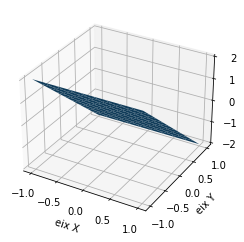

In [ ]:
# Plot planes in 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)
Z=-2*Y

fig = plt.figure()
ax = fig.gca(projection='3d')
plt.xlabel("eix X")
plt.ylabel("eix Y")

surf = ax.plot_surface(X, Y, Z)
plt.savefig('../quizes/figures/pla.png')